In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
)
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

In [11]:
data = pd.read_csv("IRIS.csv")
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
data = data[data["species"].isin(['Iris-setosa', 'Iris-versicolor'])]
data = data[["sepal_length", "sepal_width", "species"]]
data.head()

,sepal_length,sepal_width,species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

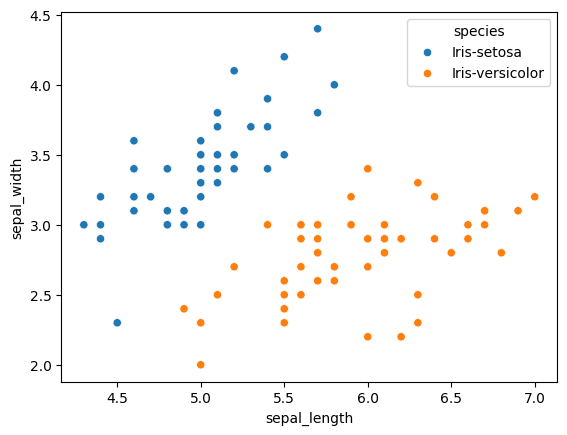

In [13]:
sns.scatterplot(data, x="sepal_length", y="sepal_width", hue="species")

In [14]:
X = data.drop(columns=["species"])
y = data["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

c:\Users\sarka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


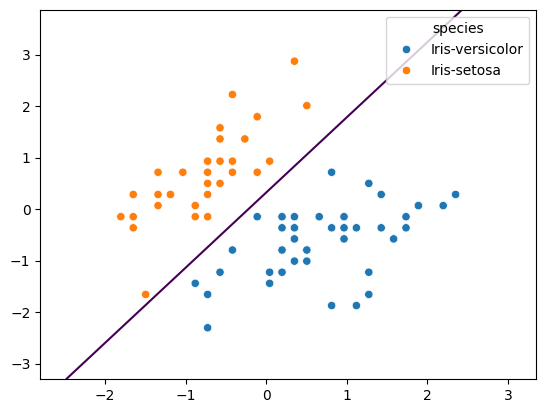

In [15]:
ax = sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
DecisionBoundaryDisplay.from_estimator(clf, X_train, ax=ax, plot_method="contour", levels=[0])

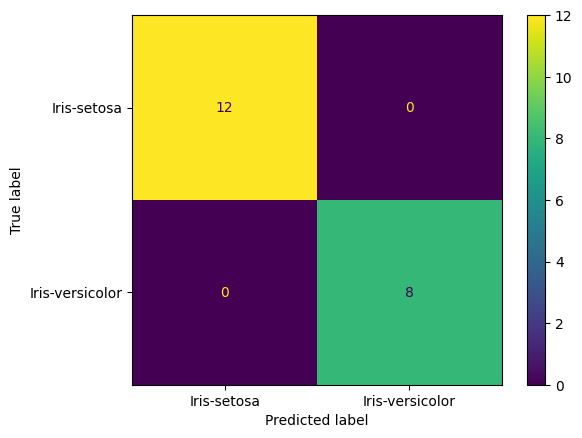

In [16]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

In [17]:
accuracy_score(y_test, y_pred)

1.0

In [18]:
data = pd.read_csv("Dry_Bean_Dataset.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,70522,1054.957,368.156404,244.520009,1.505629,0.747578,71668,299.652130,0.729883,0.984010,0.796278,0.813926,0.005220,0.001413,0.662476,0.997443,BARBUNYA
1,70692,1006.430,378.574466,238.177906,1.589461,0.777289,71443,300.013083,0.787865,0.989488,0.877027,0.792481,0.005355,0.001303,0.628026,0.998223,BARBUNYA
2,67533,997.712,358.146303,241.279504,1.484363,0.739014,68874,293.233160,0.747377,0.980530,0.852541,0.818752,0.005303,0.001470,0.670356,0.995051,BARBUNYA
3,105542,1265.623,466.135980,288.999342,1.612931,0.784610,107112,366.579116,0.747888,0.985342,0.827993,0.786421,0.004417,0.001042,0.618458,0.997530,BARBUNYA
4,67454,1014.674,343.989033,249.988996,1.376017,0.686918,68666,293.061598,0.731677,0.982349,0.823312,0.851950,0.005100,0.001657,0.725820,0.998740,BARBUNYA


In [19]:
X = data.drop(columns=["Class"])
y = data["Class"]
y.value_counts()

Class
BARBUNYA    100
CALI        100
HOROZ       100
Name: count, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = SVC(kernel="linear", decision_function_shape="ovr", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

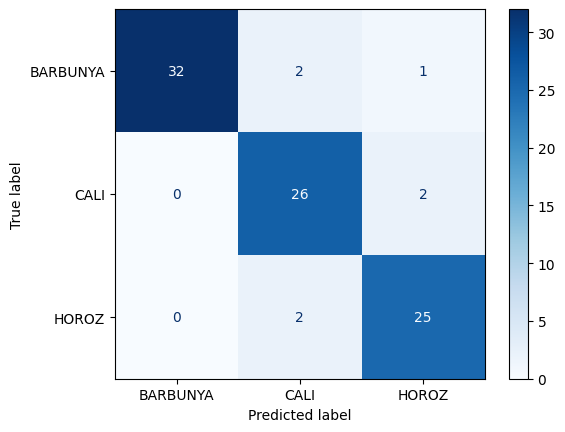

In [22]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)

In [23]:

print(accuracy_score(y_test, y_pred))

0.9222222222222223


In [ ]:
k = range(1, 30)
for item in k:
    clf = KNeighborsClassifier(n_neighbors=item)
    clf.fit(X_train, y_test)
    y_pred = clf.predic(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append([item, accuracy])

    print(f"{item,})